In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
df = pd.read_csv(r'heart_disease_clinical_data.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
# 1. perform data exploration to understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
df = df.dropna().reset_index(drop=True)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Total people who have heart disease and does not have heart disease

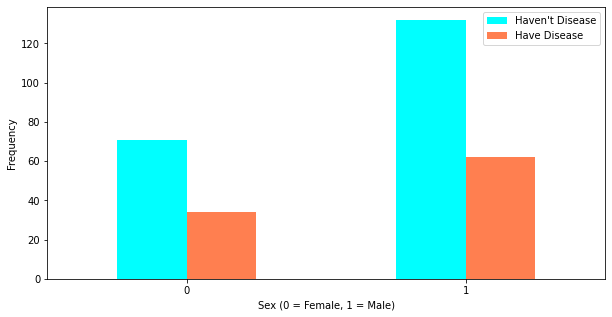

In [18]:
pd.crosstab(df.sex,df.DEATH_EVENT).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Relation of serum sodium with death event

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Relation of serum sodium with death event')

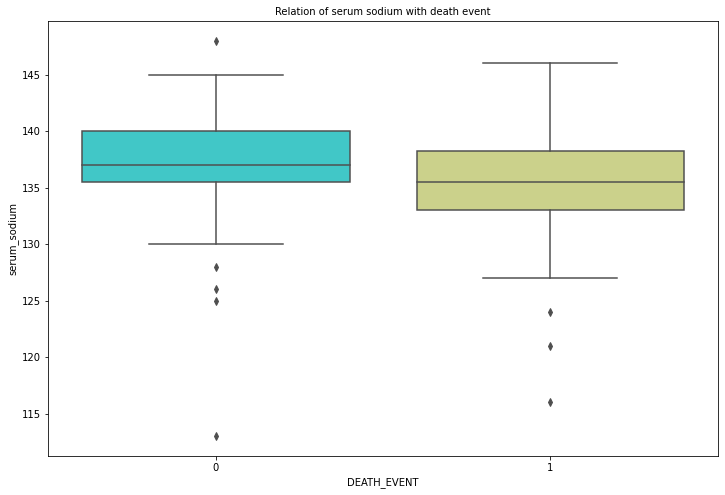

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(df['DEATH_EVENT'], df['serum_sodium'], palette = 'rainbow')
plt.title('Relation of serum sodium with death event', fontsize = 10)

Relationship between people who have heart disease and their age

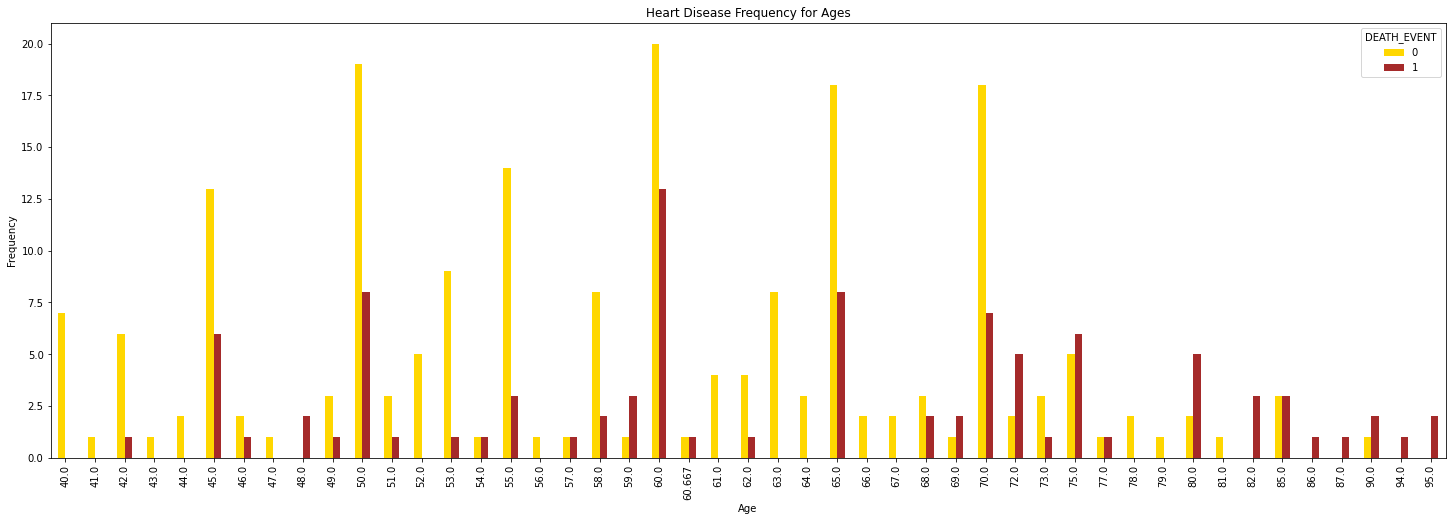

In [21]:
pd.crosstab(df.age,df.DEATH_EVENT).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Regression of serum creatinine vs serum sodium

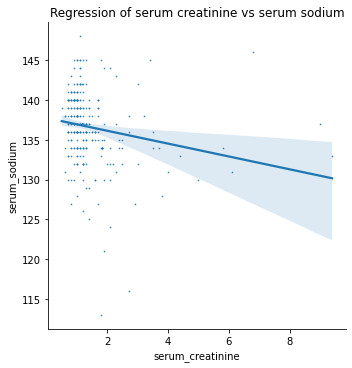

In [10]:
sns.lmplot(data=df, 
           x="serum_creatinine", 
           y="serum_sodium", 
           markers='.',
           scatter_kws={'s':2})
plt.title("Regression of serum creatinine vs serum sodium");

Relationship between creatinine_phosphokinase and serum_creatinine

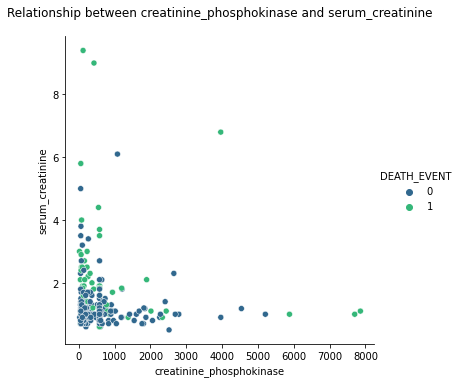

In [9]:
sns.relplot(data=df, x="creatinine_phosphokinase", y="serum_creatinine", hue="DEATH_EVENT", palette="viridis")
plt.title("Relationship between creatinine_phosphokinase and serum_creatinine", pad=20);

Prepare test and training 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

df['age_cat'] = pd.cut(df['age'], 
                     bins = [0, 25, 40, 50, 65, np.inf],
                     labels = [1, 2, 3, 4, 5])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_cat
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,5
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,4
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,4
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,3
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,4
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,4
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,3
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,3


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
# Use stratified sampling to create training and testing datasets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
splitidx = split.split(df, df['age_cat'])

for train_index, test_index in split.split(df, df['age_cat']):
    print(train_index, test_index)
    print(len(train_index), len(test_index))
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

[279 293   9  54 114  62 121 236 226  85 253 109 104 249  75  59 222 157
  36  96  63 230 238 170 182 217 248 125 188 258 167 149 135 225 119 262
  77 187 105  89  55 189   8  42 176  76  41 116  49 261 234  60  33 246
 264 106 285  15  17 168  18 204 233  57 144  29   7 203 200   5 136 196
  78  79  73 162  52 102   0  95  87 155  10  71 224  83 223 101  44 180
  88 211 273 228 127 154 202 122 277 134  37 239 278 193  65  61 139 177
 213 237  32 178 291  53 218 118 184 242   2 251  39 194 195 263 151 257
 124 110 201 227 289 175 254 190  86 292 137  24 117 133 111 286 259  97
 241   4  72 219  19  92 275 207  47  58 255 138  64 240 209 126  14 271
 276 169 216 199 295  93  94 146 284 214 243  56 221  48 287 132 270  45
  16  51  20 166 288 148 156  30  26 208 163 268 131 185 232 129 265 231
  27 152 290 272 205 206 266  40  28  43 150 130 161 128 141   6  68  70
   3 165  66  84 186  38 145 171  80  11  67  22 140 192  81 174 183 120
 100 274 283 164 250] [ 23 153 142 296 282 269  99 

In [13]:
# Compare it to random sampling
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

def get_cat_proportions(data):
    return data['age_cat'].value_counts() / len(data)

compare_props = pd.DataFrame({
    'Overall': get_cat_proportions(df),
    'Stratified': get_cat_proportions(strat_test_set),
    'Random': get_cat_proportions(test_set),
}).sort_index()
compare_props['Rand. %error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.000000,0.000000,0.000000,NaN,NaN
2,0.023411,0.016667,0.016667,-28.809524,-28.809524
3,0.224080,0.233333,0.283333,26.442786,4.129353
4,0.454849,0.450000,0.416667,-8.394608,-1.066176
5,0.297659,0.300000,0.283333,-4.812734,0.786517


In [14]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop('age_cat', axis=1, inplace=True)

df=strat_train_set.drop('DEATH_EVENT', axis=1)
df_labels=strat_train_set['DEATH_EVENT'].copy()

Pipeline

In [16]:
from sklearn.impute import SimpleImputer 
# 1. Handle numerical attributes
imputer = SimpleImputer(strategy="median")
# remove the text attribute because median can only be calculated on numerical attributes:
housing_num = df.drop(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis=1)
# fit the `imputer` instance to the training data using the `fit()` method:
imputer.fit(housing_num)
# Transform the training set:
X = imputer.transform(housing_num)

In [15]:
from sklearn.preprocessing import OneHotEncoder
# 2. Handle text/categorical attributes
housing_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
# convert categorical values into one-hot vectors
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<239x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1195 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.pipeline import Pipeline
# Pipeline for numerical attributes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # fill in missing values with median values
        #('attribs_adder', CombinedAttributesAdder()),  # add combined attributes to the data
        ('std_scaler', StandardScaler()),              # feature scaling
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [18]:
from sklearn.compose import ColumnTransformer
# Complete the pipeline with combine categorical attributes
num_attribs = list(housing_num)
cat_attribs = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [19]:
housing_prepared = full_pipeline.fit_transform(df)

In [21]:
df_prepared = full_pipeline.fit_transform(df)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing 

lb = preprocessing.LabelBinarizer()
lb.fit(df_labels)
print(lb.classes_)
labelencoded = lb.transform(df_labels).ravel()
labelencoded

[0 1]


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [23]:
lreg = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr', max_iter=1000)
clf = lreg.fit(df_prepared, labelencoded)
score = cross_val_score(clf, df_prepared, labelencoded, cv=10)
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2)) 

Logistic Regression Accuracy: 0.81 (+/- 0.10)


In [24]:
from sklearn import svm
SVM = svm.LinearSVC(max_iter=10000).fit(df_prepared, labelencoded)
scores = cross_val_score(SVM, df_prepared, labelencoded, cv=10)
print("SVM Linear Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

SVM Linear Accuracy: 0.81 (+/- 0.09)


In [25]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(df_prepared, labelencoded)
score = cross_val_score(RF, df_prepared, labelencoded, cv=10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() *2))

Random Forest Classifier Accuracy: 0.80 (+/- 0.15)


In [26]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=0)
NN = mlp.fit(df_prepared, labelencoded)
scores = cross_val_score(NN, df_prepared, labelencoded, cv=10)
print("Neural Network Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Network Accuracy: 0.77 (+/- 0.17)


Perform fine-tuning on best model

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'C': [1, 10, 20, 30],
         'intercept_scaling': [1.0, 5.0]
        }
]

clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=100)
grid_search = GridSearchCV(clf, param_grid, cv=10,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(df_prepared, labelencoded)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'C': [1, 10, 20, 30],
                          'intercept_scaling': [1.0, 5.0]}],
             return_train_score=True, scoring='accuracy')

In [28]:
cvres = grid_search.cv_results_
cvres
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8072463768115942 {'C': 1, 'intercept_scaling': 1.0}
0.8197463768115941 {'C': 1, 'intercept_scaling': 5.0}
0.8072463768115942 {'C': 10, 'intercept_scaling': 1.0}
0.8072463768115942 {'C': 10, 'intercept_scaling': 5.0}
0.8072463768115942 {'C': 20, 'intercept_scaling': 1.0}
0.8072463768115942 {'C': 20, 'intercept_scaling': 5.0}
0.8072463768115942 {'C': 30, 'intercept_scaling': 1.0}
0.8072463768115942 {'C': 30, 'intercept_scaling': 5.0}


Test ML model(best) using test set

In [29]:
print(grid_search.best_params_)
grid_search.best_estimator_

{'C': 1, 'intercept_scaling': 5.0}


LogisticRegression(C=1, intercept_scaling=5.0, random_state=0,
                   solver='liblinear')

In [30]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("DEATH_EVENT", axis=1)
y_test = strat_test_set["DEATH_EVENT"].copy()

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_test_encoded = lb.transform(y_test).ravel()

X_test_prepared = full_pipeline.transform(X_test)
final_prediction = final_model.predict(X_test_prepared)

print("Accuracy of the logistic regression model with test data:",
      round(final_model.score(X_test_prepared, y_test_encoded),4))

Accuracy of the logistic regression model with test data: 0.8667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

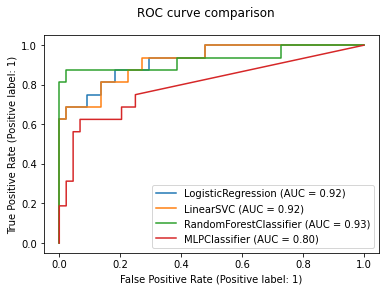

In [31]:
# Plot the ROC curve to compare the performance of the few 
# ML Classifier that we tried
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt


lrc_disp = plot_roc_curve(final_model, X_test_prepared, y_test_encoded)
svc_disp = plot_roc_curve(SVM, X_test_prepared, y_test_encoded, ax=lrc_disp.ax_)
rfc_disp = plot_roc_curve(RF, X_test_prepared, y_test_encoded, ax=lrc_disp.ax_)
nnc_disp = plot_roc_curve(NN, X_test_prepared, y_test_encoded, ax=lrc_disp.ax_)

lrc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

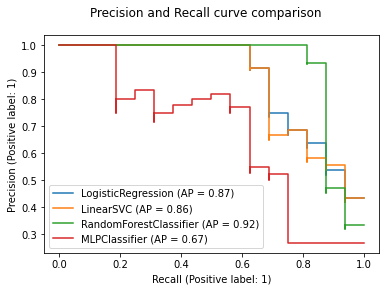

In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

lrc_disp = plot_precision_recall_curve(final_model, X_test_prepared, y_test_encoded)
svc_disp = plot_precision_recall_curve(SVM, X_test_prepared, y_test_encoded, ax=lrc_disp.ax_)
rfc_disp = plot_precision_recall_curve(RF, X_test_prepared, y_test_encoded, ax=lrc_disp.ax_)
nnc_disp = plot_precision_recall_curve(NN, X_test_prepared, y_test_encoded, ax=lrc_disp.ax_)

lrc_disp.figure_.suptitle('Precision and Recall curve comparison')

plt.show()

Confusion Matrix:
[[41  3]
 [ 5 11]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


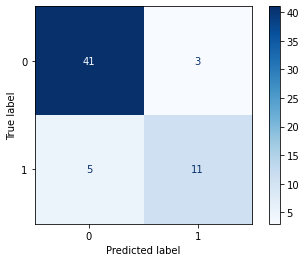

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        44
           1       0.79      0.69      0.73        16

    accuracy                           0.87        60
   macro avg       0.84      0.81      0.82        60
weighted avg       0.86      0.87      0.86        60



In [33]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test_encoded, final_prediction, labels=[0,1]))
plot_confusion_matrix(final_model, X_test_prepared, y_test_encoded, cmap="Blues", values_format = '.0f')  
plt.show()  
# Printing the precision and recall, among other metrics
print("------------------------------------------------------")
print(metrics.classification_report(y_test_encoded, final_prediction, labels=[0,1]))